In [17]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Import Pre-Processed Data
The CSV file that will be used here was from the previous notebook for pre-processing data

In [157]:
df = pd.read_csv(r"C:\Users\Neil Garcia\randomforest\dataCIC\preprocessdata.csv")

In [158]:
df

,Full request URI,Label,HasDotDotPwn,HasDataWrapperAbuse,HasDoubleEncoding,HasDomainPatterns,NullBytePattern,URILength,SpecialCharCount,PathDepth,TokenCount,HasAttackVector
0,dvwa/vulnerabilities/fi/..%000x5c..%000x5cetc0...,1,0,1,1,1,1,55,9,4,7,1
1,dvwa/vulnerabilities/fi/?.%uF025?.%uF025?.%uF0...,1,0,1,1,1,0,63,13,4,15,1
2,dvwa/vulnerabilities/fi/%c0.%c0.%c1%9c%c0.%c0....,1,0,1,1,1,0,123,41,4,53,1
3,dvwa/vulnerabilities/fi/.?%252f.?%252fetc%252f...,1,0,1,1,1,0,52,10,4,10,1
4,dvwa/vulnerabilities/fi/..%01%%32%%66..%01%%32...,1,0,1,1,1,0,119,49,4,61,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6258,dvwa/vulnerabilities/fi/%5C..%c0%af%5C..%c0%af...,1,0,1,1,1,0,105,35,4,47,1
6259,dvwa/vulnerabilities/fi/%c0.%c0.%252f%c0.%c0.%...,1,0,1,1,1,0,77,19,4,21,1
6260,dvwa/vulnerabilities/fi/%c0.%c0.%c1%pc%c0.%c0....,1,0,1,1,1,0,67,17,4,21,1
6261,dvwa/vulnerabilities/fi/%252e%252e%c0%af%252e%...,1,0,1,1,1,0,103,21,4,37,1


In [160]:
common_values = df['Full request URI'].value_counts()
common_values = common_values[common_values > 1].index.tolist()

# Count occurrences of each common value
for value in common_values:
    count = df[df['Full request URI'] == value].shape[0]
    print(f"'{value}' occurs {count}")


'dvwa/login.php' occurs 1067
'dvwa/favicon.ico' occurs 25
'dvwa/vulnerabilities/exec/' occurs 25
'dvwa/vulnerabilities/upload/' occurs 22
'dvwa/vulnerabilities/sqli_blind/' occurs 21
'dvwa/setup.php' occurs 20
'dvwa/vulnerabilities/fi/?page=include.php' occurs 20
'dvwa/instructions.php' occurs 19
'dvwa/vulnerabilities/brute/' occurs 18
'dvwa/vulnerabilities/xss_r/' occurs 18
'dvwa/vulnerabilities/sqli/' occurs 18
'dvwa/vulnerabilities/csrf/' occurs 17
'dvwa/vulnerabilities/xss_s/' occurs 15
'dvwa/security.php' occurs 14
'dvwa/phpinfo.php?=PHPE9568F35-D428-11d2-A769-00AA001ACF42' occurs 11
'dvwa/phpinfo.php?=SUHO8567F54-D428-14d2-A769-00DA302A5F18' occurs 11
'dvwa/phpinfo.php?=PHPE9568F34-D428-11d2-A769-00AA001ACF42' occurs 11
'dvwa/phpinfo.php' occurs 11
'dvwa/instructions.php?doc=changelog' occurs 9
'dvwa/' occurs 9
'dvwa/instructions.php?doc=copying' occurs 8
'dvwa/about.php' occurs 6
'dvwa/instructions.php?doc=readme' occurs 6
'favicon.ico' occurs 6
'dvwa/dvwa/images/lock.png' occur

-----------------------

# Ensuring rows that contain null are removed
Removal of Full request URI column will be removed as several features were extracted and converted into a numeric representation in either boolean or integer value

In [161]:
# Drop rows that are null
df.dropna

# Drop also the Full request URI since strings cannot be processed by RF 
df = df.drop(labels=['Full request URI'], axis=1)

1    4825
0    1438
Name: Label, dtype: int64


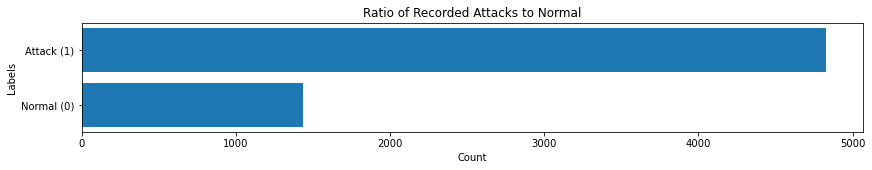

In [162]:
# Check if the ratio of attack(1) and normal(0) entry on the dataset needs to be balanced from one way to another
value_counts = df['Label'].value_counts()
print(value_counts)

# Create a bar chart
plt.figure(figsize=(14, 2))

plt.barh(value_counts.index, value_counts.values)
plt.xlabel('Count')
plt.ylabel('Labels')
plt.title('Ratio of Recorded Attacks to Normal')

# Customize y-axis labels
plt.yticks(value_counts.index, ['Attack (1)', 'Normal (0)'])
plt.show()

# Defining Independent and Dependent Variables
Separating the targeted variable which is the 'Label' column from the other features(column) in the dataframe. Making the Y variable as the pinnacle definition, if considering all the columns from 'X', can dictate if it is an attack or not.

In [163]:
# define dependent variable
Y = df['Label'].values
Y=Y.astype('int')

# define independent variables
X = df.drop(labels=['Label'], axis=1)

In [47]:
# install this package to process the balancing of dataset
pip install --user imbalanced-learn

SyntaxError: invalid syntax (Temp/ipykernel_5744/4075812919.py, line 2)

# SMOTENN 
A technique to use when the dataset is imbalance so that the dataset to be used in training the model can provide a quality detection rate. SMOTE-ENN is a combination of over and under sampling technqiue to ensure the dataset is in a fair and balanced playing field

In [164]:
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=42)
x_ST, y_ST = smote_enn.fit_resample(X, Y)

#### Validating if the playing field of data is fair between attack or normal

Count of Attacks(1): 4811
Count of Normal(0): 4819


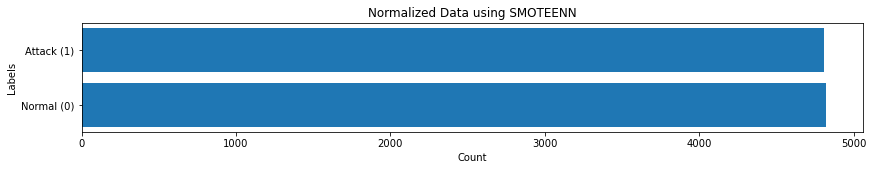

In [165]:
from collections import Counter
counts = Counter(y_ST)

# Access the counts
count_0 = counts[0]
count_1 = counts[1]

print("Count of Attacks(1):", count_1)
print("Count of Normal(0):", count_0)

# Create a bar chart
plt.figure(figsize=(14, 2))
plt.barh(['Normal (0)', 'Attack (1)'], [count_0, count_1])
plt.xlabel('Count')
plt.ylabel('Labels')
plt.title('Normalized Data using SMOTEENN')
plt.show()


# Split the dataset
The 80% of the dataset will be used for training the model and 20% will be left for testing the data

In [166]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_ST, y_ST, test_size=0.2, random_state=42, shuffle=True)

# Test the model and get performance evaluation

In [167]:
# Use the Random Forest
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(x_train,y_train)

# Get the performance metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Train Score : ",model.score(x_train,y_train)," Test Score : ",model.score(x_test,y_test))
y_pred=model.predict(x_test)

print("\nTraining Samples & Columns", x_train.shape, "\nTesting Samples", y_pred.shape)

Train Score :  1.0  Test Score :  0.9994807892004154

Training Samples & Columns (7704, 10) 
Testing Samples (1926,)


# Check metrics

In [168]:
from sklearn import metrics
print("accuracy :" , accuracy_score(y_test, y_pred)*100)

# Generate and print a classification report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)

accuracy : 99.94807892004154
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       956
           1       1.00      1.00      1.00       970

    accuracy                           1.00      1926
   macro avg       1.00      1.00      1.00      1926
weighted avg       1.00      1.00      1.00      1926



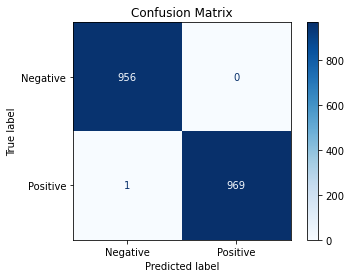

In [169]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Create a confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Display the confusion matrix as a heatmap with integer values
disp = ConfusionMatrixDisplay(confusion_matrix=confusion, display_labels=['Negative', 'Positive'])

# Use values_format to display values as integers
disp.plot(cmap=plt.cm.Blues, values_format="d")  # "d" specifies integer format
plt.title('Confusion Matrix')
plt.show()

In [170]:
feature_list = list(X.columns)
feature_imp = pd.Series(model.feature_importances_, index=feature_list).sort_values(ascending=False)
print(feature_imp)

HasAttackVector        0.300986
TokenCount             0.257335
PathDepth              0.192479
SpecialCharCount       0.119820
HasDoubleEncoding      0.088910
URILength              0.018797
HasDataWrapperAbuse    0.012218
HasDomainPatterns      0.006448
NullBytePattern        0.002934
HasDotDotPwn           0.000073
dtype: float64
